In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sales-in-europe/Sales.csv


In [2]:
bike_sales=pd.read_csv('../input/bike-sales-in-europe/Sales.csv')
bike_sales.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
bike_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [4]:
bike_sales.shape

(113036, 18)

# **#Checking Null values in the data**

In [5]:
bike_sales.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [6]:
bike_sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


**Checking duplicate values**

In [7]:
bike_sales.duplicated().values.any()

True

In [8]:
bike_sales.duplicated().sum()

1000

**Removing duplicate values**

In [9]:
bike_sales = bike_sales.drop_duplicates()

In [10]:
bike_sales.duplicated().values.any()

False

# **EDA**

<AxesSubplot:ylabel='Density'>

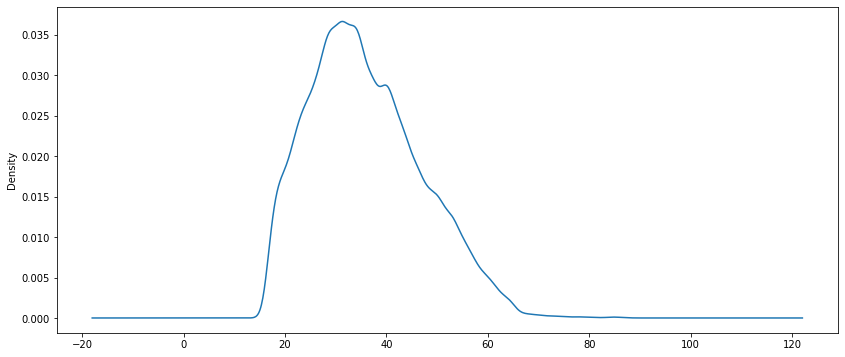

In [11]:
bike_sales['Customer_Age'].plot(kind='kde',figsize=(14,6))

> The above graph showing the people with age of 20-60 are buying the most.

In [12]:
bike_sales['Age_Group'].value_counts()

Adults (35-64)          55358
Young Adults (25-34)    38299
Youth (<25)             17660
Seniors (64+)             719
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

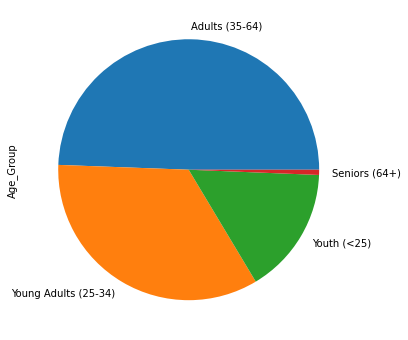

In [13]:
bike_sales['Age_Group'].value_counts().plot(kind='pie',figsize=(6,6))

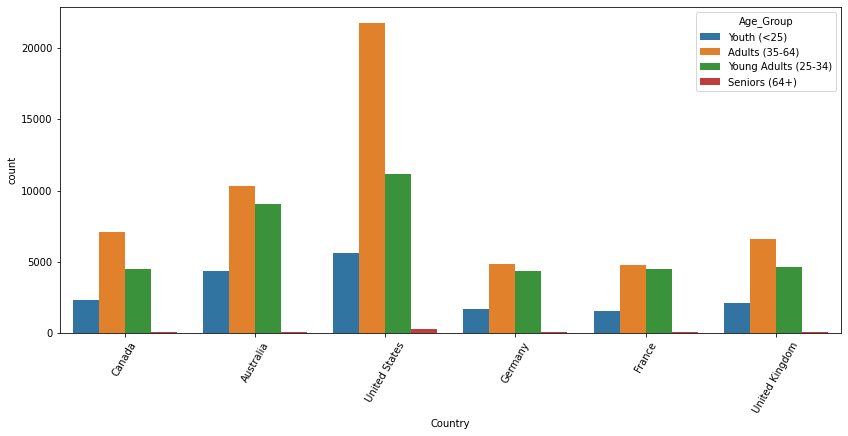

In [14]:
sns.countplot(data = bike_sales, x='Country', hue='Age_Group')
plt.xticks(rotation=60)
plt.gcf().set_size_inches(14,6)
plt.show()

<AxesSubplot:>

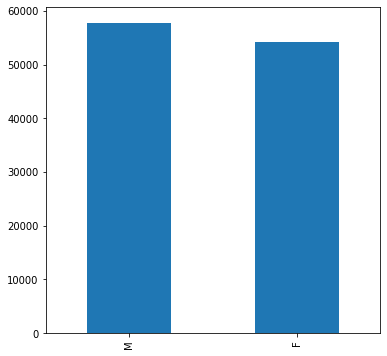

In [15]:
bike_sales['Customer_Gender'].value_counts().plot(kind='bar', figsize=(6,6))

> It is evident that men make the most purchases.

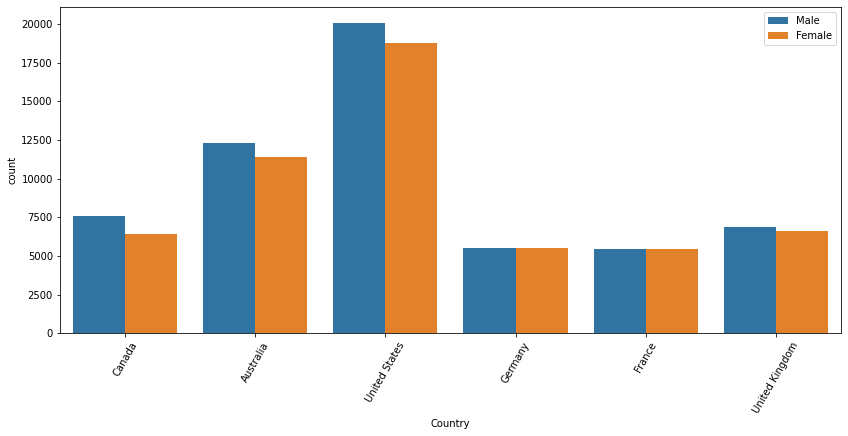

In [16]:
sns.countplot(data = bike_sales, x='Country', hue='Customer_Gender')
plt.xticks(rotation=60)
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(14,6)
plt.show()

In [17]:
rs = bike_sales.groupby('Customer_Gender')['Sub_Category'].value_counts()
rs

Customer_Gender  Sub_Category     
F                Tires and Tubes      16060
                 Bottles and Cages     7692
                 Road Bikes            6475
                 Helmets               5790
                 Mountain Bikes        4446
                 Jerseys               2831
                 Caps                  2162
                 Fenders               1878
                 Touring Bikes         1831
                 Gloves                1210
                 Cleaners               862
                 Shorts                 834
                 Hydration Packs        648
                 Socks                  536
                 Vests                  452
                 Bike Racks             268
                 Bike Stands            248
M                Tires and Tubes      17238
                 Bottles and Cages     7957
                 Road Bikes            6838
                 Helmets               6360
                 Mountain Bikes        43

<AxesSubplot:xlabel='Sub_Category', ylabel='count'>

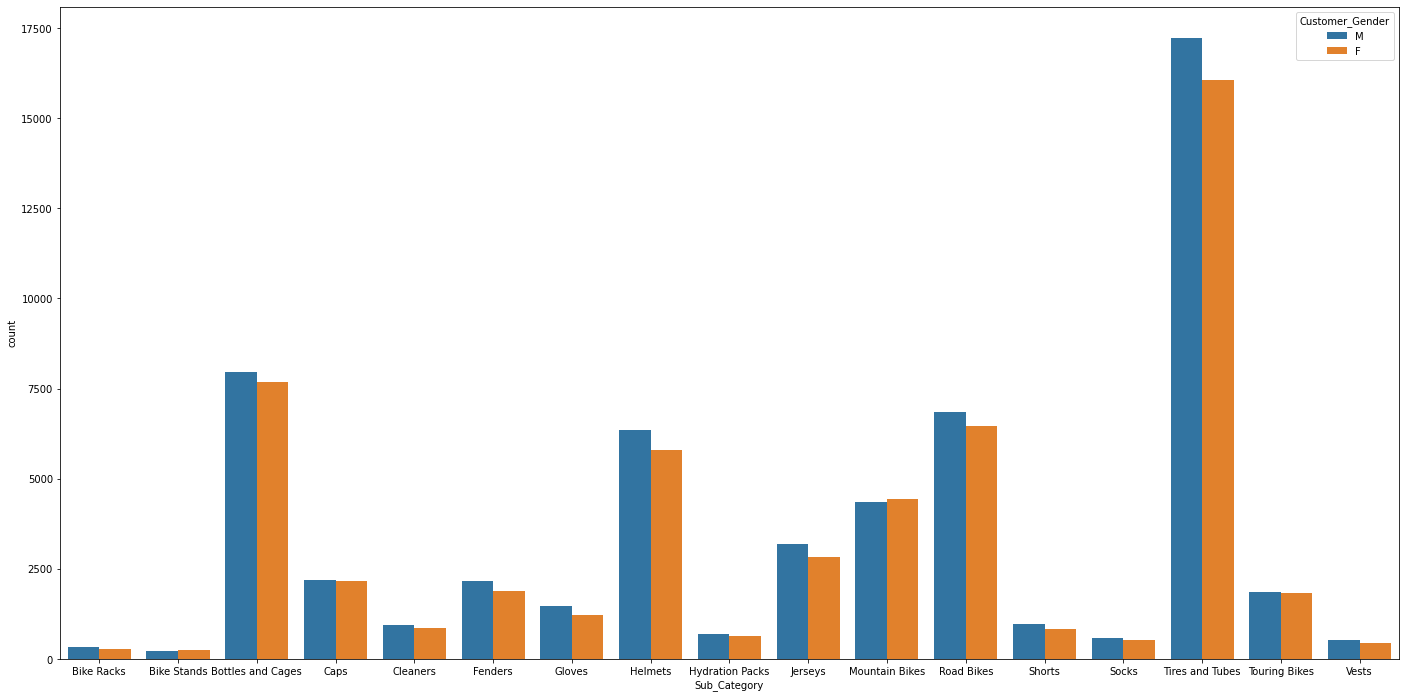

In [18]:
fig, rs = plt.subplots(figsize=(24,12))
rs = bike_sales.groupby('Customer_Gender')['Sub_Category'].value_counts()
sns.countplot(data = bike_sales, x='Sub_Category', hue='Customer_Gender')

# **What product category has the most sales??**

<AxesSubplot:ylabel='Product_Category'>

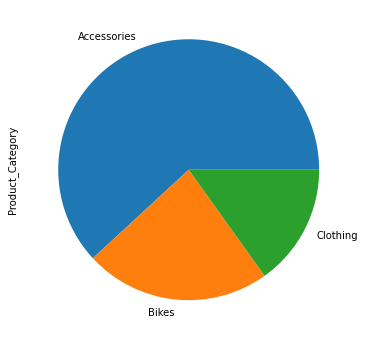

In [19]:
bike_sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

<AxesSubplot:>

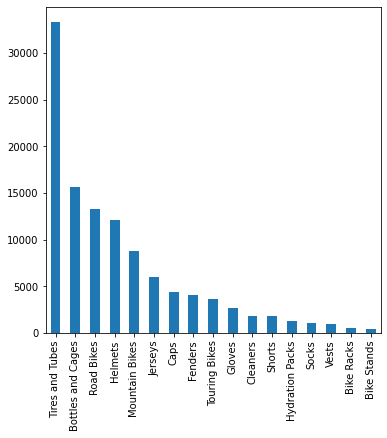

In [20]:
bike_sales['Sub_Category'].value_counts().plot(kind='bar', figsize=(6,6))

# **Which country and year has the highest profit, cost and revenue?**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Country-wise cost,revenue and profit')

<Figure size 1008x576 with 0 Axes>

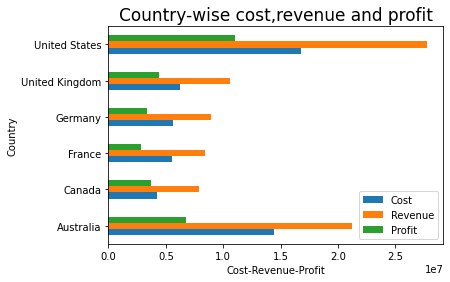

In [21]:
plt.figure(figsize=(14,8))
ax = bike_sales.groupby('Country')['Cost','Revenue','Profit'].sum().plot(kind='barh')
ax.set(xlabel='Cost-Revenue-Profit', ylabel='Country')
plt.title("Country-wise cost,revenue and profit",fontsize=17)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


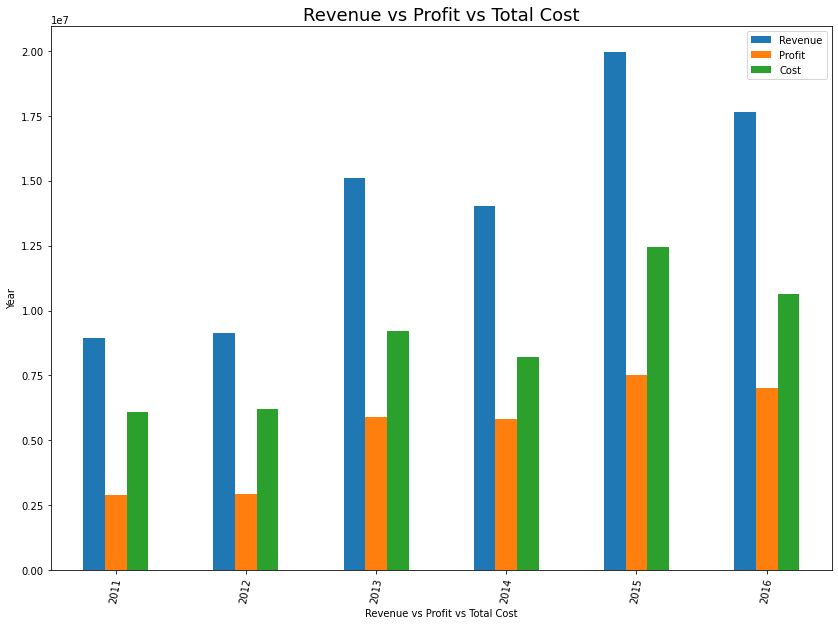

In [22]:
ax = bike_sales.groupby('Year')['Revenue', 'Profit', 'Cost'].sum().plot(kind='bar')
ax.set(xlabel='Revenue vs Profit vs Total Cost', ylabel='Year')
plt.xticks(rotation=80)
plt.title("Revenue vs Profit vs Total Cost",fontsize=18)
plt.gcf().set_size_inches(14,10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


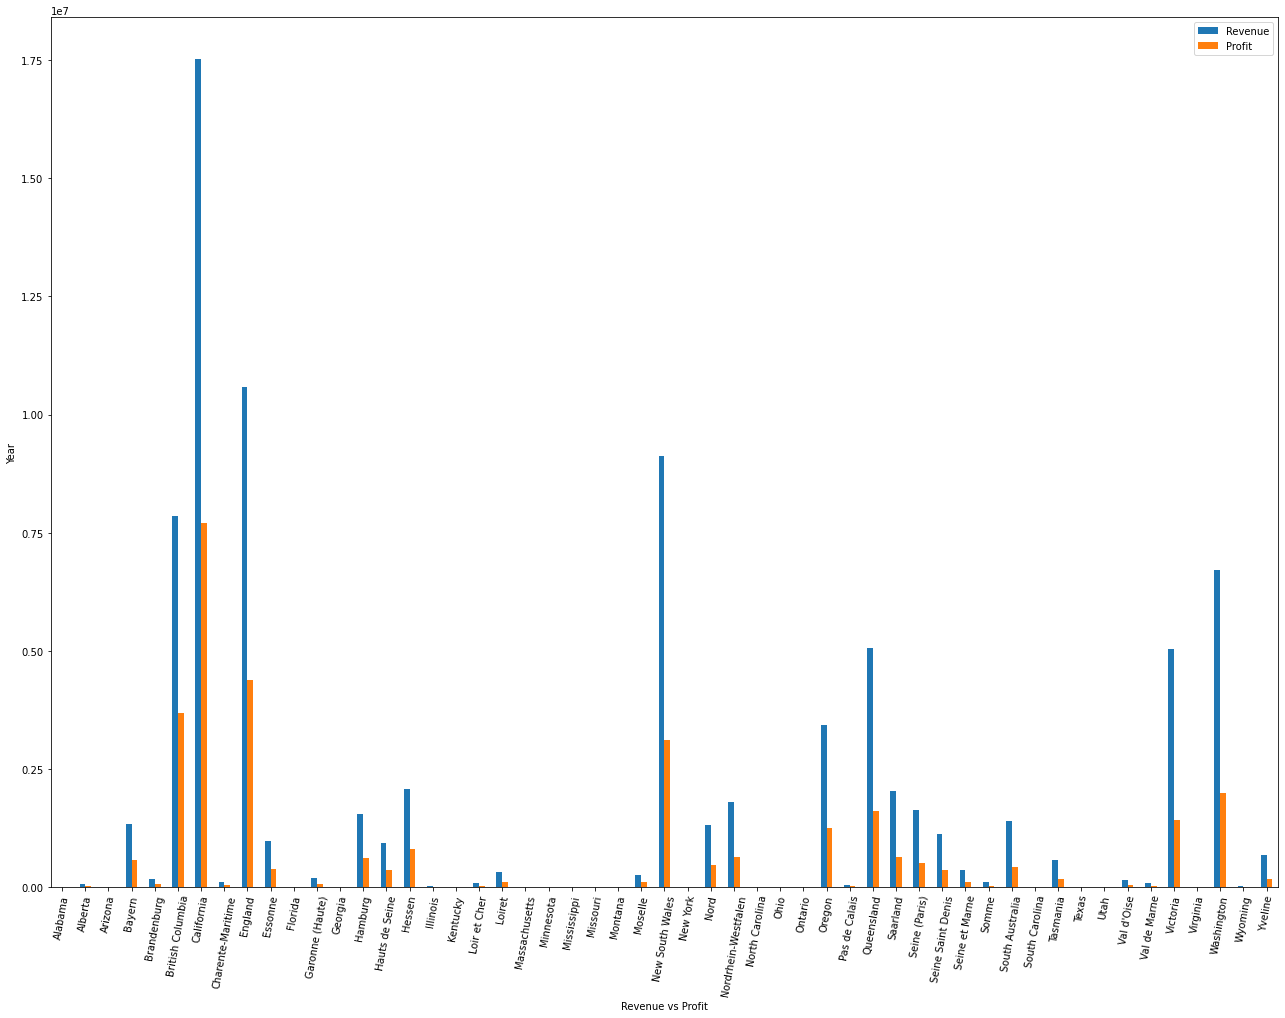

In [23]:
ax = bike_sales.groupby('State')['Revenue', 'Profit'].sum().plot(kind='bar')
ax.set(xlabel='Revenue vs Profit', ylabel='Year')
plt.xticks(rotation=80)
plt.gcf().set_size_inches(22,16)

# **Annual and monthly transactions**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Annual Transaction')

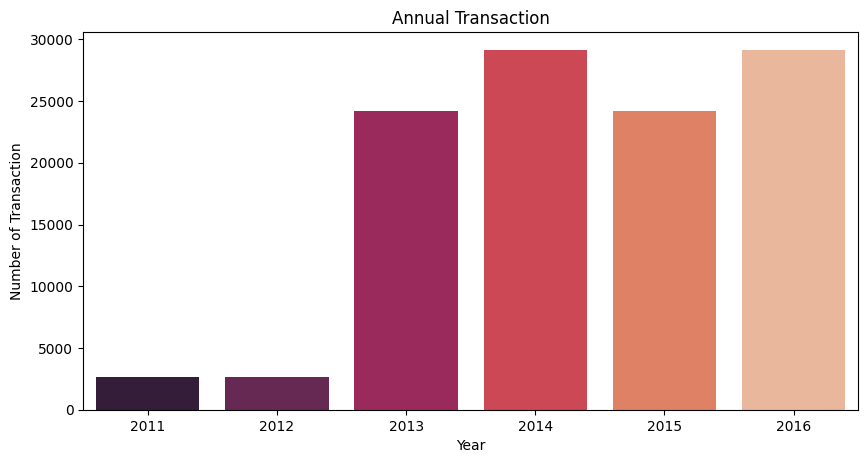

In [24]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(bike_sales['Year'],palette='rocket')
plt.xlabel('Year')
plt.ylabel('Number of Transaction')
plt.title('Annual Transaction')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Monthly Cumulative Transaction')

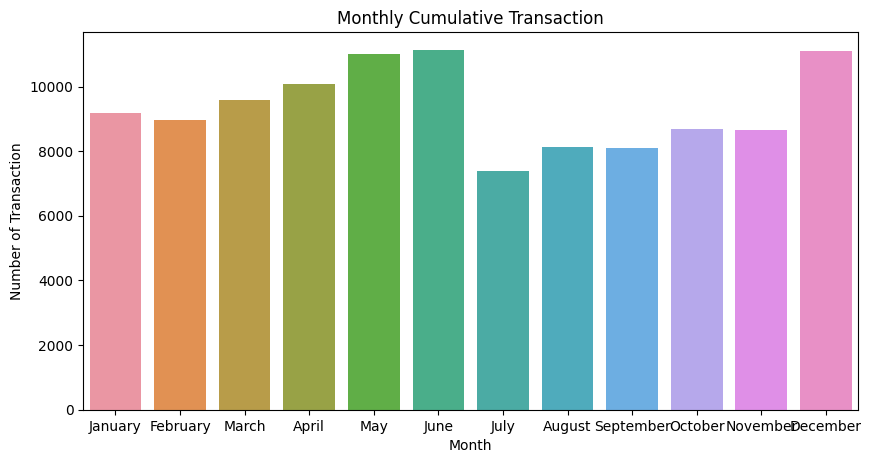

In [25]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(bike_sales['Month'],order = month_order)
plt.xlabel('Month')
plt.ylabel('Number of Transaction')
plt.title('Monthly Cumulative Transaction')

# **Correlation**

In [26]:
corr =bike_sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007435,-0.015186,-0.002845,0.003520,0.003578,0.004714,0.003493,0.003995
Year,-0.007435,1.000000,0.040879,0.124091,-0.217431,-0.213538,-0.181349,-0.215449,-0.208514
Customer_Age,-0.015186,0.040879,1.000000,0.027376,-0.021401,-0.020301,0.004388,-0.016012,-0.009303
Order_Quantity,-0.002845,0.124091,0.027376,1.000000,-0.516289,-0.516387,-0.238770,-0.340386,-0.312880
Unit_Cost,0.003520,-0.217431,-0.021401,-0.516289,1.000000,0.997891,0.740623,0.829557,0.817544
Unit_Price,0.003578,-0.213538,-0.020301,-0.516387,0.997891,1.000000,0.749450,0.825965,0.818176
Profit,0.004714,-0.181349,0.004388,-0.238770,0.740623,0.749450,1.000000,0.902109,0.956508
Cost,0.003493,-0.215449,-0.016012,-0.340386,0.829557,0.825965,0.902109,1.000000,0.988748
Revenue,0.003995,-0.208514,-0.009303,-0.312880,0.817544,0.818176,0.956508,0.988748,1.000000


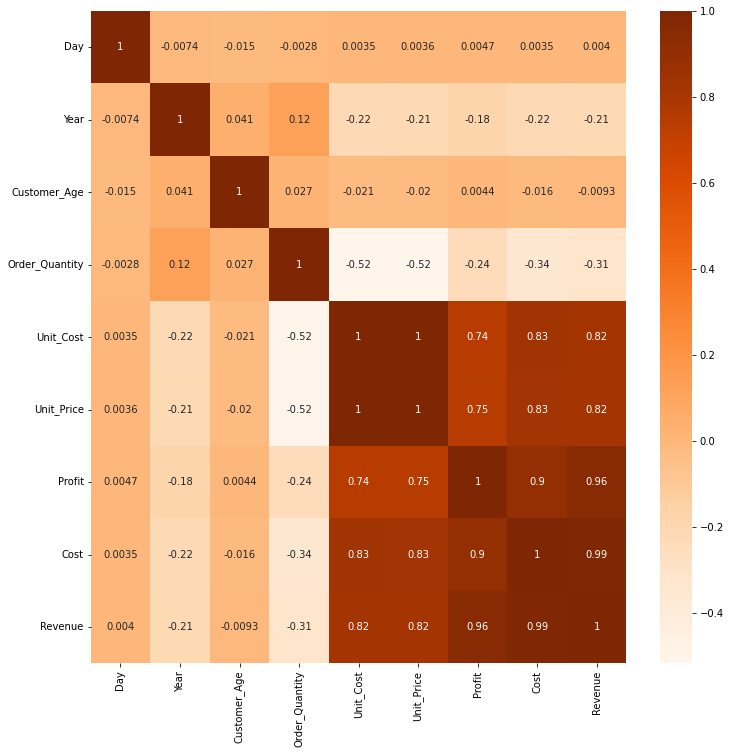

In [27]:
cp = sns.heatmap(corr,cmap='Oranges', annot=True)
plt.gcf().set_size_inches(12,12)

**Seeing relationship between Unit_price and Unit_cost**

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

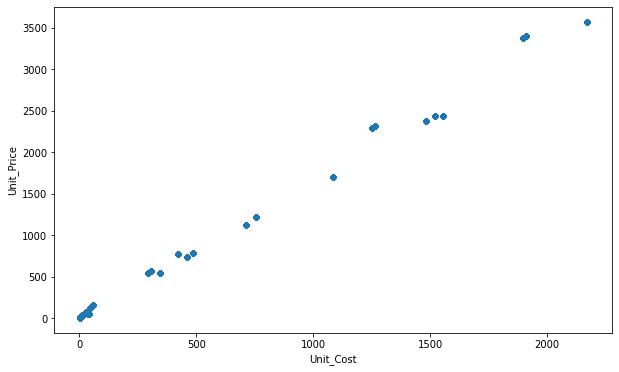

In [28]:
bike_sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(10,6))

**Seeing relationship between Profit and Cost**

<AxesSubplot:xlabel='Profit', ylabel='Cost'>

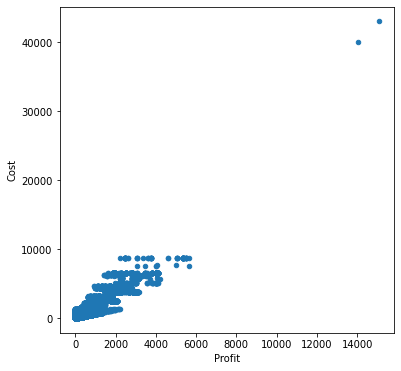

In [29]:
bike_sales.plot(kind='scatter', x='Profit', y='Cost', figsize=(6,6))

# **Conclusion**

**Data insights**

* Most of the sales takes place in United states, california. 
* Most buyers are adults and young adults with age group of 25-64.
* Majority buyers are found to be males.
* The accessories category sees the majority of sales, with road bikes, helmets, drinks, and cages selling best.
* The largest profit, revenue, and cost were recorded in the United States and Australia.
* May-June and December have recorded the most transactions.